In [1]:
#https://scipy-lectures.org/packages/statistics/index.html

In [2]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv('C:\\Users\\akalita\\OneDrive for Business\\Desktop\\Datasets\\brain_size.csv',sep=";",na_values=".")

In [44]:
df.head(3)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437


In [45]:
#creating from arrays

t=np.linspace(-6,6,20)
sin_t=np.sin(t)
cos_t=np.cos(t)

In [46]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}).head(3)


,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451


In [47]:
#Manipulating
print(df.shape)
print(df.columns)
print(df['Gender'])

(40, 8)
Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')
0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [48]:
# Simpler selector
df[df['Gender']=='Female']['VIQ'].mean()

109.45

In [49]:
#groupby: splitting a dataframe on values of categorical variables:
groupby_gender=df.groupby('Gender')

for gender,value in groupby_gender['VIQ']:
    print((gender,value.mean()))

('Female', 109.45)
('Male', 115.25)


In [50]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [51]:
df['VIQ'].mean()

112.35

In [58]:
df[df['Gender']=='Male'].count()

Unnamed: 0    20
Gender        20
FSIQ          20
VIQ           20
PIQ           20
Weight        18
Height        19
MRI_Count     20
dtype: int64

In [72]:

print(np.average(df[df['Gender']=='Female']['MRI_Count']))
print(np.average(df[df['Gender']=='Male']['MRI_Count']))

862654.6
954855.4


C:\Users\akalita\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9C818E518>,
      dtype=object)

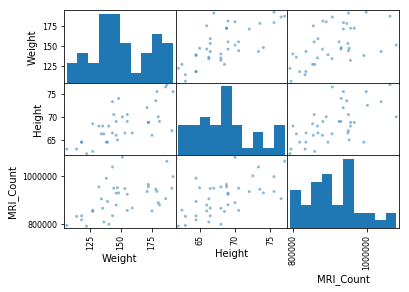

In [78]:
#Plotting data
#Scatter matrices:

from pandas.tools import plotting

plotting.scatter_matrix(df[['Weight', 'Height', 'MRI_Count']])

In [79]:
#Hypothesis testing: comparing two groups

#1-sample t-test: testing the value of a population mean

from scipy import stats
stats.ttest_1samp(df['VIQ'],0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [80]:
#2-sample t-test: testing for difference across populations

female_viq=df[df['Gender']=='Female']['VIQ']
male_viq=df[df['Gender']=='Male']['VIQ']

stats.ttest_ind(female_viq,male_viq)

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [89]:
#Paired tests: repeated measurements on the same individuals

#PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:
print(stats.ttest_ind(df['FSIQ'], df['PIQ']))   

#The problem with this approach is that it forgets that there are links between observations: 
#FSIQ and PIQ are measured on the same individuals.

print(stats.ttest_rel(df['FSIQ'], df['PIQ']))   

#This is equivalent to a 1-sample test on the difference:

print(stats.ttest_1samp(df['FSIQ'] - df['PIQ'], 0))   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)
Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)
Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)


In [91]:
#T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:
stats.wilcoxon(df['FSIQ'], df['PIQ'])   


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [98]:
#Linear models, multiple factors, and analysis of variance
#A simple linear regression

import numpy as np
x=np.linspace(-5,5,20)
np.random.seed(1)

y=-5+3*x+4*np.random.normal(size=x.shape)

df=pd.DataFrame({'x':x,'y':y})

In [99]:
#Then we specify an OLS model and fit it:
from statsmodels.formula.api import ols
model = ols("y ~ x", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 03 May 2020   Prob (F-statistic):           8.56e-08
Time:                        19:01:47   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [ ]:
# Interpretation

#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [101]:
#Categorical variables: comparing groups or multiple categories

df=pd.read_csv('C:\\Users\\akalita\\OneDrive for Business\\Desktop\\Datasets\\brain_size.csv',sep=";",na_values=".")
df.head(2)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121


In [102]:
#We can write a comparison between IQ of male and female using a linear model:

model=ols("VIQ ~ Gender +1", df).fit()
print(model.summary())

#Intercept: We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sun, 03 May 2020   Prob (F-statistic):              0.445
Time:                        22:21:17   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [108]:
#Forcing categorical: the ‘Gender’ is automatically detected as a categorical variable, 
#and thus each of its different values are treated as different entities

#An integer column can be forced to be treated as categorical using:

model=ols('VIQ ~ C(Gender)+1',df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sun, 03 May 2020   Prob (F-statistic):              0.445
Time:                        22:35:44   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

In [121]:
#Link to t-tests between different FSIQ and PIQ

#To compare different types of IQ, we need to create a “long-form” table, 
#listing IQs, where the type of IQ is indicated by a categorical variable:

df_fisq = pd.DataFrame({'iq': df['FSIQ'], 'type': 'fsiq'})
df_piq=pd.DataFrame({'iq':df['PIQ'],'type':'piq'})
df_viq=pd.DataFrame({'iq':df['VIQ'],'type':'viq'})

#2 brackets below
df_long=pd.concat((df_fisq,df_piq))
df_long.head(2)

,iq,type
0,133,fsiq
1,140,fsiq


In [123]:
model=ols("iq ~ type", df_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Sun, 03 May 2020   Prob (F-statistic):              0.643
Time:                        22:51:16   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [124]:
stats.ttest_ind(df['FSIQ'],df['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [126]:
#Multiple Regression: including multiple factors

data=pd.read_csv('C:\\Users\\akalita\\OneDrive for Business\\Desktop\\Datasets\\iris.csv')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [129]:
model=ols('sepal_width~ name+petal_length',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 04 May 2020   Prob (F-statistic):           1.58e-20
Time:                        16:59:49   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [130]:
#analysis of variance (ANOVA)

#test if the petal length is different between versicolor and virginica, after removing the effect of sepal width

#testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above

#we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test:

print(model.f_test([0, 1, -1, 0])) 

<F test: F=array([[3.24533535]]), p=0.07369058781701142, df_denom=146, df_num=1>


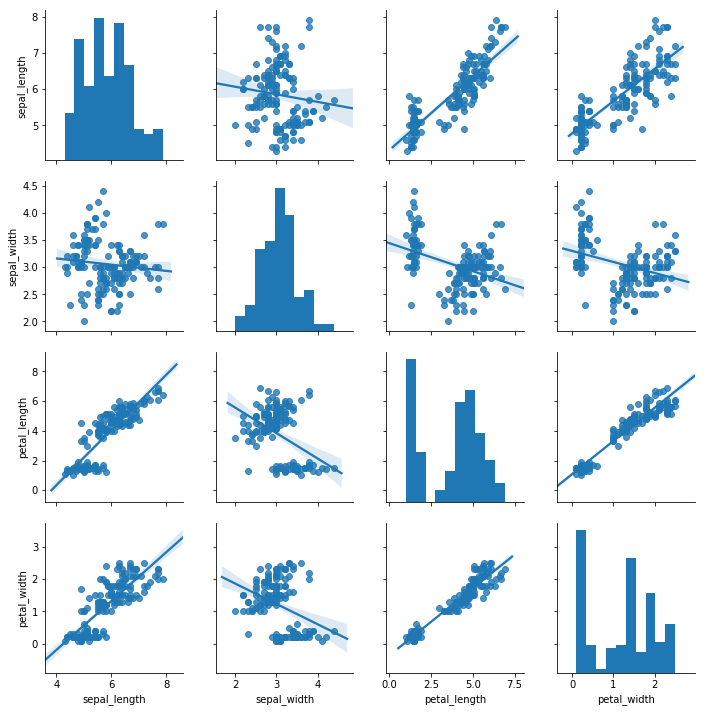

In [131]:
#seaborn

import seaborn
seaborn.pairplot(data,vars=['sepal_length','sepal_width','petal_length','petal_width'],kind='reg')

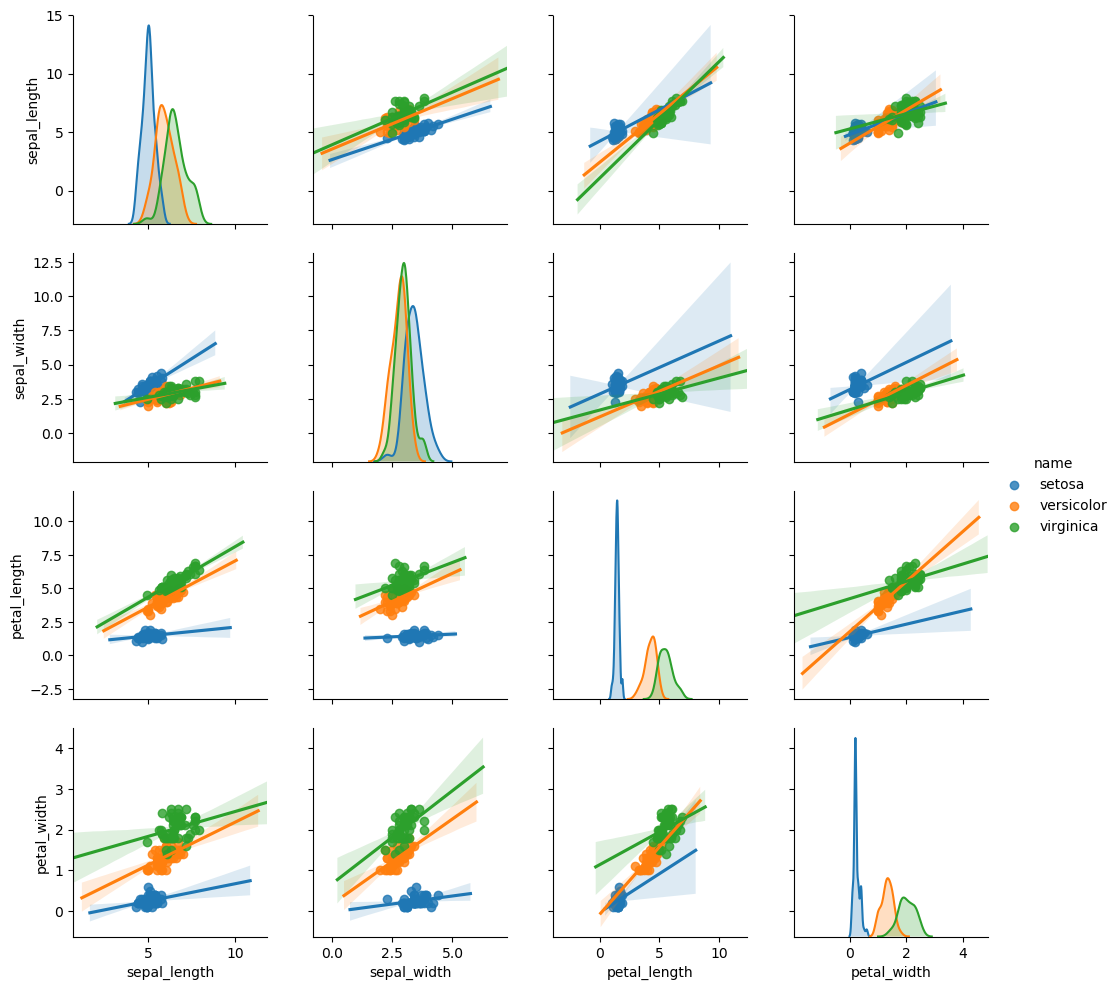

In [136]:
#Categorical variables can be plotted as the hue:
seaborn.pairplot(data, vars=['sepal_length','sepal_width','petal_length','petal_width'],
                 kind='reg', hue='name') 

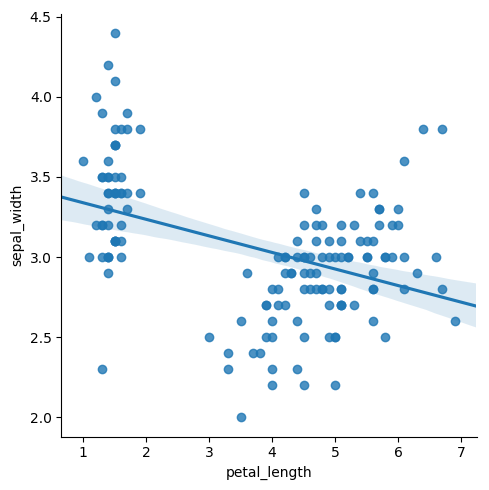

In [138]:
#lmplot: plotting a univariate regression
seaborn.lmplot(y='sepal_width',x='petal_length',data=data)

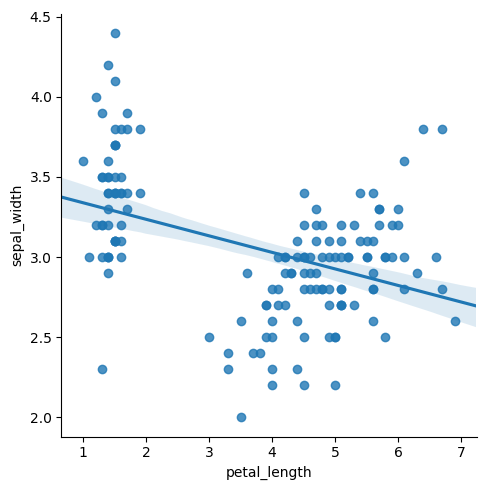

In [139]:
#To compute a regression that is less sentive to outliers, one must use a robust model. This is done in seaborn using robust=True

seaborn.lmplot(y='sepal_width',x='petal_length',data=data, robust=True)

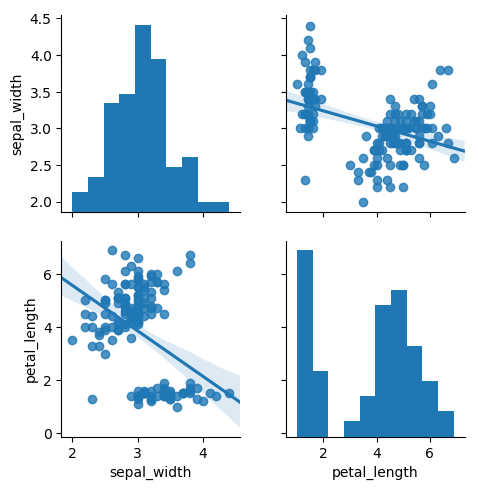

In [141]:
#Testing for interactions

seaborn.pairplot(data, vars=['sepal_width','petal_length'],kind='reg', hue='name')


Text(0.5,0,'Z')

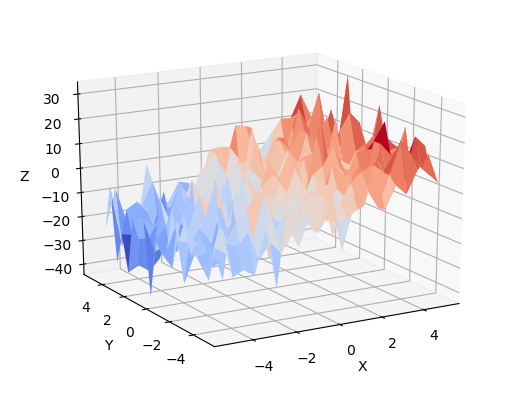

In [144]:
#Multiple Regression

from mpl_toolkits.mplot3d import Axes3D
x=np.linspace(-5,5,21)
X,Y=np.meshgrid(x,x)

np.random.seed(1)

Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

#plot the data
fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X,Y,Z,cmap=plt.cm.coolwarm,rstride=1,cstride=1)

ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')